In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', '..'))

In [2]:
%matplotlib inline

from session.sessions import selected_009266, selected_008229
from imports import *
from scipy import stats
from loading import load_session_data
from target import get_spike_counts
np.set_printoptions(suppress=True)

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Session data

In [4]:
#selected_009266
selected_008229

['008229_hippoSIT_2022-05-17_21-44-43',
 '008229_hippoSIT_2022-05-16_20-36-44',
 '008229_hippoSIT_2022-05-20_15-54-39',
 '008229_hippoSIT_2022-05-18_14-36-18']

In [5]:
session = selected_008229[0]

session_data = load_session_data(session)

tl = session_data['tl']
trials = session_data['trials']
cfg = session_data['cfg']
areas = session_data['areas']
aeps = session_data['aeps']
aeps_events = session_data['aeps_events']
AEP_metrics_lims = session_data['AEP_metrics_lims']
AEP_metrics_raw = session_data['AEP_metrics_raw']
AEP_metrics_norm = session_data['AEP_metrics_norm']
tgt_matrix = session_data['tgt_matrix']
single_units = session_data['single_units']
spike_times = session_data['spike_times']
unit_names = session_data['unit_names']
animal = session_data['animal']
aeps_file = session_data['aeps_file']
h5_file = session_data['h5_file']
report_path = session_data['report_path']
session

'008229_hippoSIT_2022-05-17_21-44-43'

In [6]:
aeps_tl_idxs = []  # idxs to timeline for AEP events
#for event_t in aeps_events[:, 0]:  # AEP event times
for event_t in aeps_events[aeps_events[:, 1] == 1][:, 0]:  # BACKGOUND ONLY!!!
    event_idx = (np.abs(tl[:, 0] - event_t)).argmin()
    aeps_tl_idxs.append(event_idx)
aeps_tl_idxs = np.array(aeps_tl_idxs)

Text(0.5, 1.0, '8-8')

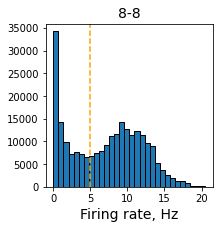

In [7]:
unit = '8-8'
i_rate = single_units[unit]
#thresh = i_rate.mean()
thresh = 5

fig, ax = plt.subplots(1, 1, figsize=(3, 3))
ax.hist(i_rate, bins=30, edgecolor='black')
ax.axvline(thresh, color='orange', ls='--')
ax.set_xlabel('Firing rate, Hz', fontsize=14)
ax.set_title(unit, fontsize=14)

## Evoked responses

In [8]:
thresh = i_rate.mean()
#thresh = 5
idxs_high = np.where(i_rate[aeps_tl_idxs] > thresh)[0]
idxs_low  = np.where(i_rate[aeps_tl_idxs] < thresh)[0]
idxs_high.shape, idxs_low.shape

((3510,), (1730,))

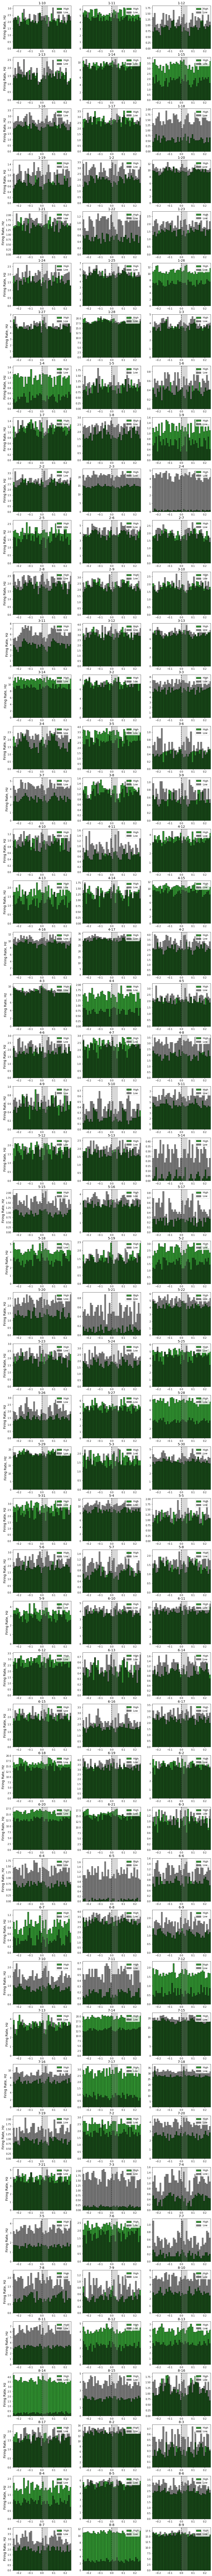

In [9]:
hw, bc = 0.25, 41
cols = 3
rows = int(np.ceil(len(unit_names)/cols))
fig = plt.figure(figsize=(15, rows*4))

for i, unit_name in enumerate(unit_names):
    bins, counts_high = get_spike_counts(spike_times[unit_name], tl[aeps_tl_idxs[idxs_high]][:, 0], hw=hw, bin_count=bc)
    bins, counts_low  = get_spike_counts(spike_times[unit_name], tl[aeps_tl_idxs[idxs_low]][:, 0], hw=hw, bin_count=bc)
    
    ax = fig.add_subplot(rows, cols, i+1)
    ax.hist(bins[:-1], bins=bins, weights=counts_high, edgecolor='black', color='green', alpha=0.8, label='High')
    ax.hist(bins[:-1], bins=bins, weights=counts_low, edgecolor='black', color='black', alpha=0.5, label='Low')
    ax.axvline(0, color='black', ls='--')
    #ax.set_xlabel('Pulse onset, s', fontsize=14)
    ax.axvspan(0, 0.05, alpha=0.3, color='gray')
    ax.set_title(unit_name, fontsize=14)
    ax.legend(loc='upper right', prop={'size': 10})
    ax.set_xlim(-hw, hw)
    if i % 3 == 0:
        ax.set_ylabel("Firing Rate, Hz", fontsize=14)

fig.savefig(os.path.join(report_path, 'PSTH_AL_high_low.pdf'))